In [1]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
os.getcwd()


pd.set_option('display.max_columns', None)

In [2]:
# read the data

train = pd.read_csv('data/train.csv', index_col=['Id'])
test = pd.read_csv('data/test.csv', index_col=['Id'])

In [3]:
# show shapes
print('train:', train.shape)
print('test:', test.shape)

train: (1460, 80)
test: (1459, 79)


In [4]:
# check columns integrity
print('missing column:', set(train.columns) - set(test.columns))

missing column: {'SalePrice'}


In [5]:
del test

In [6]:
print(train.FullBath.value_counts())


2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64


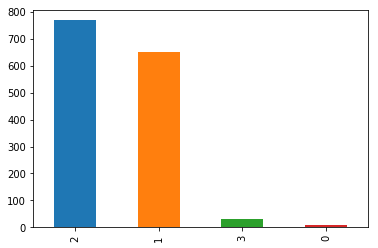

In [7]:
train.FullBath.value_counts().plot(kind='bar');


D:\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


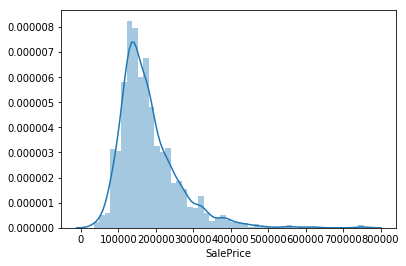

In [8]:
# that's what we are trying to predict - the sale price
sns.distplot(train.SalePrice);


In [9]:
from sklearn.model_selection import train_test_split

# split the dataset to with and without labels
train_no_sale_price = train.drop(labels=['SalePrice'], axis=1)
train_sale_price = train['SalePrice']

# split the train set to 70/30 train/test
x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price, 
                                                    train_sale_price, 
                                                    test_size=0.3, 
                                                    random_state=4330)

In [10]:
# Make sure correct data fell int the correct variables
for df in [x_train, x_test, y_train, y_test]:
    print(df.shape)

(1022, 79)
(438, 79)
(1022,)
(438,)


In [11]:
# check the data types in each column
x_train.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
128,45,RM,55.0,4388,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Unf,5,7,1930,1950,Gable,CompShg,WdShing,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,LwQ,116,Unf,0,556,672,GasA,Ex,Y,SBrkr,840,0,0,840,0,0,1,0,3,1,TA,5,Typ,1,TA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal


In [12]:
# a lot of string and NaN values, let's see what happens
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

ValueError: could not convert string to float: 'Abnorml'

In [13]:
# string values causing issues, let's fix em

# how many of these 'Abnorml' values are there
print((x_train.values == 'Abnorml').sum())

col_idx = pd.np.argmax(x_train.values == 'Abnorml', axis=1).max()

x_train.iloc[:, col_idx].value_counts()

76


Normal     825
Partial     96
Abnorml     76
Family      16
Alloca       7
AdjLand      2
Name: SaleCondition, dtype: int64

In [14]:
numeric_column_names = x_train.describe().columns
print(numeric_column_names)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [15]:
# a LOT of non-numeric column names
print(x_train.columns.difference(numeric_column_names))

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')


In [16]:
regressor.fit(x_train[numeric_column_names], y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [17]:
# get null columns
nulls = x_train[numeric_column_names].isnull().sum()
nulls[nulls > 0]

LotFrontage    171
MasVnrArea       4
GarageYrBlt     49
dtype: int64

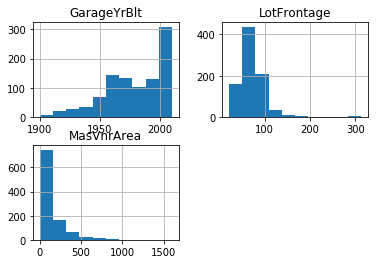

In [18]:
x_train[['LotFrontage','GarageYrBlt', 'MasVnrArea']].hist();

In [19]:
# fill NaN values with 0
x_train[numeric_column_names] = x_train[numeric_column_names].fillna(0)

D:\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [20]:
x_train[numeric_column_names].isnull().sum(axis=0).value_counts()

0    36
dtype: int64

In [21]:
regressor.fit(x_train[numeric_column_names], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
regressor.score(x_train[numeric_column_names], y_train)

0.7981263665303393

[ 94546.59021574 319548.4326495  140270.63909417 224453.01768405
 236313.23539591 164261.63064395  86677.32797051 254333.97137667]


D:\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


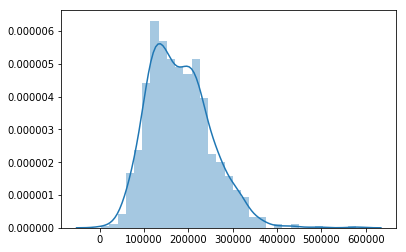

In [23]:
predictions = regressor.predict(x_train[numeric_column_names])

print(predictions[:8])

sns.distplot(predictions);

In [24]:
differences = (predictions - y_train).round(0)
print(differences[:8])

Id
128      7547.0
878    -30452.0
880      3771.0
163      4453.0
1181   -13687.0
853       262.0
77     -49073.0
603     34334.0
Name: SalePrice, dtype: float64


D:\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


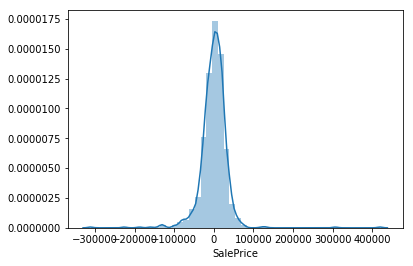

In [25]:
sns.distplot(differences);

In [26]:
1 - predictions / y_train

Id
128    -0.086742
878     0.087004
880    -0.027624
163    -0.020241
1181    0.054747
853    -0.001595
77      0.361493
603    -0.156064
728    -0.130023
426    -0.222207
778    -0.020786
199    -0.230265
821    -0.050727
544    -0.170601
93      0.160838
1249   -0.306441
339    -0.152666
1060    0.145712
1329    0.054484
730     0.239740
955    -0.084148
453    -0.005291
1334    0.042539
1160   -0.031798
295    -0.202122
400     0.061028
1456   -0.044798
951    -0.129279
1233    0.136930
403     0.079735
          ...   
1152   -0.020383
1331   -0.165594
42      0.186363
1248   -0.042433
539     0.101123
1288    0.039354
282     0.008311
1035    0.142629
818    -0.065591
1006    0.130712
770     0.239865
437    -0.193128
805     0.075290
910    -0.054099
668    -0.166734
1297   -0.048575
760    -0.013173
964    -0.140401
172     0.037941
779    -0.150388
736    -0.149271
1368    0.113770
1161   -0.002653
859    -0.229818
1239   -0.142167
1114   -0.025753
796    -0.112036
832    -0.0

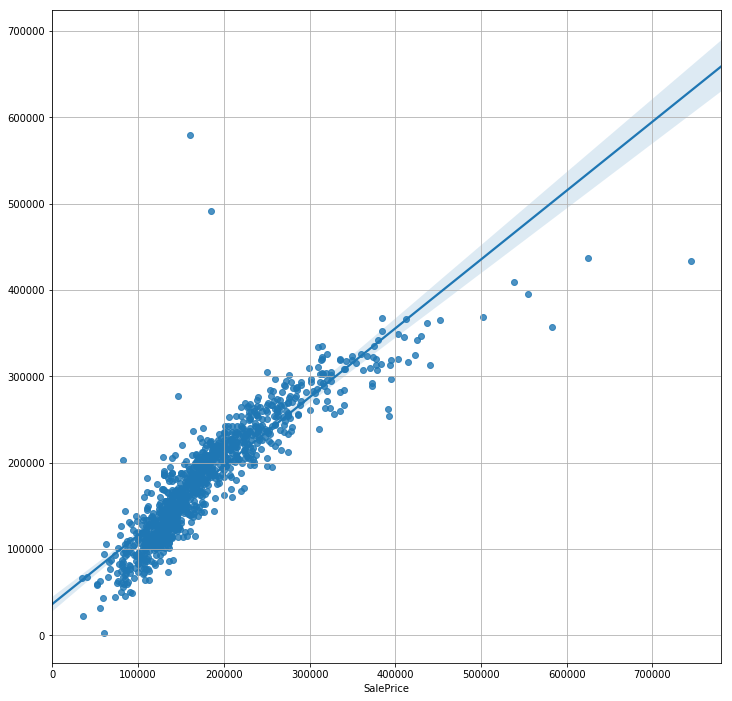

In [27]:
plt.figure(figsize=(12,12))
sns.regplot(y_train, predictions)
plt.grid(True)
plt.show()

In [28]:
# get nulls in test set
test_nulls = x_test[numeric_column_names].isnull().sum()
test_nulls[test_nulls > 0]

LotFrontage    88
MasVnrArea      4
GarageYrBlt    32
dtype: int64

In [31]:
# fill with 0
x_test[numeric_column_names] = x_test[numeric_column_names].fillna(0)

D:\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


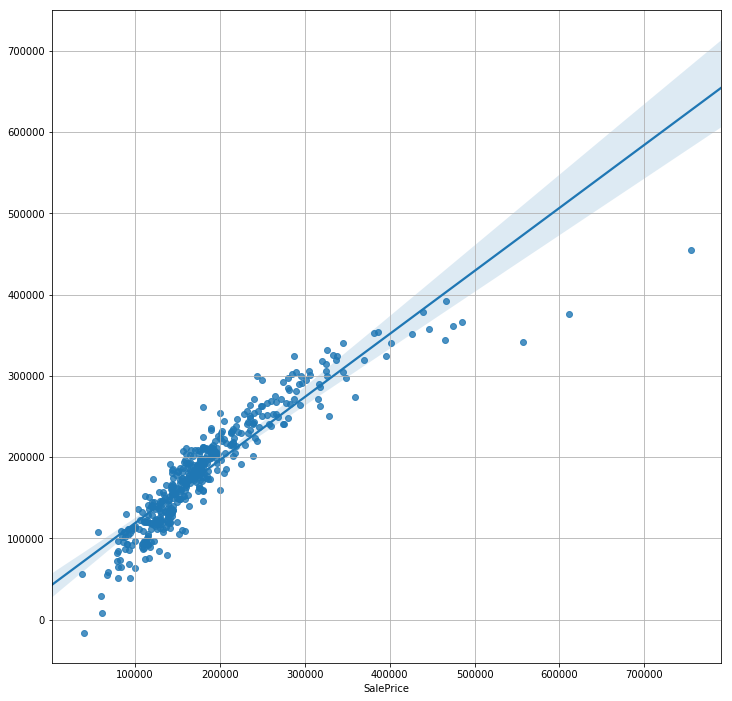

In [32]:
predictions_test = regressor.predict(x_test[numeric_column_names])
plt.figure(figsize=(12,12))
sns.regplot(y_test, predictions_test)
plt.grid(True)
plt.show()

In [33]:
print("score for test:", regressor.score(x_test[numeric_column_names], y_test))

score for test: 0.8412021213022842


In [34]:
deviation = 1 - predictions_test / y_test
print(deviation)

Id
479     0.018122
1129   -0.010815
385    -0.059755
1123    0.338558
1217   -0.359040
1426   -0.134347
1419    0.051172
19     -0.007233
245    -0.192125
813    -0.927298
1141    0.011083
483    -0.127019
12      0.012037
1157    0.120079
526    -0.116394
1440   -0.040661
374     0.000197
375     0.024539
300     0.060924
181     0.086438
66      0.084394
471    -0.015362
352    -0.112881
443     0.054963
224    -0.142758
718     0.032673
561    -0.420380
96     -0.039151
1377   -0.022206
564     0.041166
          ...   
651     0.002211
11      0.088399
191     0.137430
844     0.197260
1147   -0.074028
501    -0.062425
1111   -0.100869
338    -0.083786
1155   -0.135748
235    -0.030780
1398    0.121317
976    -0.116731
1134   -0.006644
225     0.082827
121     0.025593
974    -0.092684
198    -0.124674
649    -0.124935
233    -0.125176
289     0.207898
670     0.419179
717    -0.323250
901     0.197516
272     0.075097
91      0.206079
648    -0.090689
184    -0.116892
800     0.0

D:\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


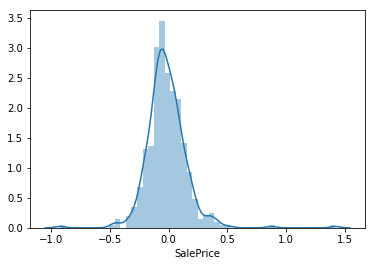

In [35]:
sns.distplot(deviation)

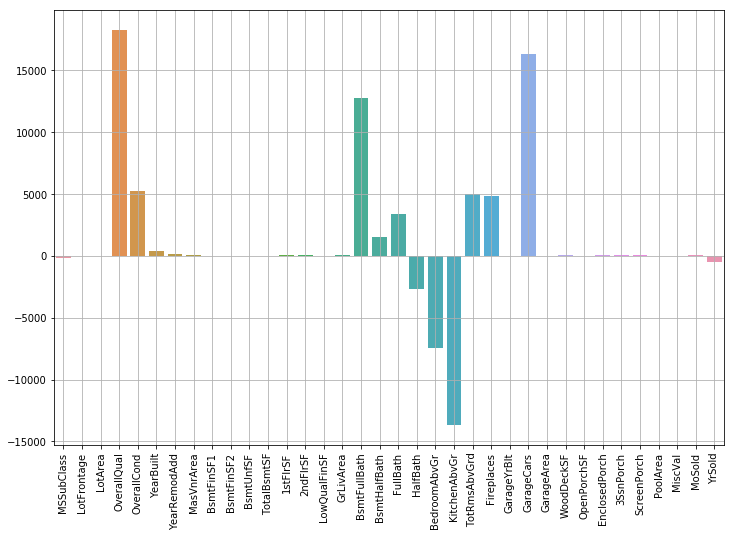

In [36]:
plt.figure(figsize=(12,8))
barplot = sns.barplot(x=numeric_column_names, y=regressor.coef_, orient='vertical')
plt.setp(barplot.get_xticklabels(), rotation=90); plt.grid(True);

In [37]:
print(regressor.intercept_)
print(regressor.coef_)

55884.02712138821
[-1.74092382e+02 -1.59334956e+01  3.90604746e-01  1.82477174e+04
  5.21657989e+03  3.75326569e+02  1.36580705e+02  2.17291147e+01
  6.20814805e+00  7.67033126e-03 -6.04172069e-01  5.61164632e+00
  1.99827845e+01  2.17552995e+01 -2.43299134e+01  1.74081705e+01
  1.26936626e+04  1.50351700e+03  3.33729642e+03 -2.70834376e+03
 -7.47762034e+03 -1.36774474e+04  4.95468307e+03  4.80689715e+03
 -1.46397401e+01  1.62721482e+04  6.62093154e+00  3.00251352e+01
  3.95602564e+00  3.05792346e+01  4.55257238e+01  7.31855496e+01
 -6.40235362e+00 -2.58236600e+00  2.66355805e+01 -5.50741893e+02]


In [38]:
print(regressor.intercept_, " + ",)
list(zip(regressor.coef_, "*"*len(regressor.coef_), numeric_column_names, ))

55884.02712138821  + 


[(-174.09238201319448, '*', 'MSSubClass'),
 (-15.933495614875191, '*', 'LotFrontage'),
 (0.390604745658185, '*', 'LotArea'),
 (18247.717407530934, '*', 'OverallQual'),
 (5216.57989417071, '*', 'OverallCond'),
 (375.32656942569037, '*', 'YearBuilt'),
 (136.58070545801348, '*', 'YearRemodAdd'),
 (21.72911466905664, '*', 'MasVnrArea'),
 (6.208148050417414, '*', 'BsmtFinSF1'),
 (0.0076703312592697175, '*', 'BsmtFinSF2'),
 (-0.6041720685652621, '*', 'BsmtUnfSF'),
 (5.611646318426406, '*', 'TotalBsmtSF'),
 (19.982784461179115, '*', '1stFlrSF'),
 (21.755299479630235, '*', '2ndFlrSF'),
 (-24.329913407150503, '*', 'LowQualFinSF'),
 (17.4081705360278, '*', 'GrLivArea'),
 (12693.662631968898, '*', 'BsmtFullBath'),
 (1503.5170040009755, '*', 'BsmtHalfBath'),
 (3337.296423502987, '*', 'FullBath'),
 (-2708.343756269804, '*', 'HalfBath'),
 (-7477.620342121068, '*', 'BedroomAbvGr'),
 (-13677.447367546461, '*', 'KitchenAbvGr'),
 (4954.683072214047, '*', 'TotRmsAbvGrd'),
 (4806.897153734239, '*', 'Firep

In [39]:
pd.options.display.max_rows = 10
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [40]:
categorical_columns = train.dtypes[train.dtypes == 'object'].index
print(categorical_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [41]:
# Label Encoder tutorial - labels to numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

print("Learned classes:", le.classes_)

capitals_list = ["tokyo", "tokyo", "paris"]

print("transformed:", capitals_list, " to:", le.transform(["tokyo", "tokyo", "paris"])) 
print("inverse:", [2, 2, 1, 0], " to:", le.inverse_transform([2, 2, 1, 0]))

Learned classes: ['amsterdam' 'paris' 'tokyo']
transformed: ['tokyo', 'tokyo', 'paris']  to: [2 2 1]
inverse: [2, 2, 1, 0]  to: ['tokyo' 'tokyo' 'paris' 'amsterdam']


D:\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [42]:
# One Hot Encoder tutorial - binarization - MUST always use it with Label Encoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

enc.fit([[0, 0, 3], 
         [1, 1, 0], 
         [0, 2, 1], 
         [1, 0, 2]])

print("Number of unique IDs for column:", enc.n_values_)
print("Where does the feature start/end:", enc.feature_indices_)
print(enc.transform([[0, 1, 1]]).toarray())
print(enc.transform([[1, 2, 3]]).toarray())

Number of unique IDs for column: [2 3 4]
Where does the feature start/end: [0 2 5 9]
[[1. 0. 0. 1. 0. 0. 1. 0. 0.]]
[[0. 1. 0. 0. 1. 0. 0. 0. 1.]]


In [43]:
train = train.fillna("")
encoders = {col: LabelEncoder().fit(train[col]) for col in categorical_columns}

print(encoders['MSZoning'].classes_)
print(encoders['Street'].classes_)

['C (all)' 'FV' 'RH' 'RL' 'RM']
['Grvl' 'Pave']


In [44]:
print(train['Alley'])


Id
1        
2        
3        
4        
5        
       ..
1456     
1457     
1458     
1459     
1460     
Name: Alley, Length: 1460, dtype: object


In [45]:
def encode_categorical(data, columns, encoders):
    data = data.fillna("")
    return pd.DataFrame({col: encoders[col].transform(data[col]) for col in columns},
                        index = data.index)

train_encoded = encode_categorical(train, categorical_columns, encoders)

pd.options.display.max_columns=12
train_encoded.head(8)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,...,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,
1,3,1,0,3,3,0,...,2,0,0,0,8,4
2,3,1,0,3,3,0,...,2,0,0,0,8,4
3,3,1,0,0,3,0,...,2,0,0,0,8,4
4,3,1,0,0,3,0,...,2,0,0,0,8,0
5,3,1,0,0,3,0,...,2,0,0,0,8,4
6,3,1,0,0,3,0,...,2,0,3,3,8,4
7,3,1,0,3,3,0,...,2,0,0,0,8,4
8,3,1,0,0,3,0,...,2,0,0,3,8,4


In [46]:
one_hot_encoder = OneHotEncoder().fit(train_encoded)

print(one_hot_encoder.transform(train_encoded[:10]).todense())
print(one_hot_encoder.transform(train_encoded).shape)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(1460, 268)


In [47]:
from sklearn.linear_model import LinearRegression 

one_hot_x_train = one_hot_encoder.transform(encode_categorical(x_train[categorical_columns], categorical_columns, encoders))

cat_regression = LinearRegression().fit(one_hot_x_train, y_train)
print(cat_regression.score(one_hot_x_train, y_train))

one_hot_x_test = one_hot_encoder.transform(encode_categorical(x_test[categorical_columns], categorical_columns, encoders))
print(cat_regression.score(one_hot_x_test, y_test))

0.8770468421966168
0.7430500254138905


In [48]:
x_train[numeric_column_names].shape, one_hot_x_train.shape

((1022, 36), (1022, 268))

In [49]:
new_x_train = pd.np.concatenate([one_hot_x_train.todense(), x_train[numeric_column_names]], axis=1)
new_x_test = pd.np.concatenate([one_hot_x_test.todense(), x_test[numeric_column_names]], axis=1)
print(new_x_train.shape, new_x_test.shape)

(1022, 304) (438, 304)


In [50]:
all_data_lr = LinearRegression().fit(new_x_train, y_train)
print(all_data_lr.score(new_x_train, y_train))
print(all_data_lr.score(new_x_test, y_test))

0.9374772944028724
-14761240.716965368


In [51]:
# regularization - helps tweak the model

from sklearn.linear_model import Ridge

alpha = [0.01, 0.1, 1, 10, 100]

for a in alpha:
    all_data_lr = Ridge(alpha = a).fit(new_x_train, y_train)
    print('alpha:', a)
    print(all_data_lr.score(new_x_train, y_train), all_data_lr.score(new_x_test, y_test))
    print()

alpha: 0.01
0.9374607177132872 0.8488214740142476

alpha: 0.1
0.936445464241952 0.85962824282679

alpha: 1
0.922736065601494 0.8824267159987822

alpha: 10
0.8933107135132801 0.8922404784820497

alpha: 100
0.8524424288746798 0.882169210027329



In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.distplot(y_train)
plt.subplot(1, 2, 2)
sns.distplot(pd.np.log10(y_train))

In [ ]:
all_data_lr = LinearRegression().fit(new_x_train, pd.np.log10(y_train))
print(all_data_lr.score(new_x_train, pd.np.log10(y_train)))
print(all_data_lr.score(new_x_test, pd.np.log10(y_test)))

In [ ]:
alphas = [0.01, 0.1, 1, 10, 100]
for alpha in alphas:
    all_data_lr = Ridge(alpha = alpha).fit(new_x_train, pd.np.log10(y_train))
    print('alpha:', alpha)
    print(all_data_lr.score(new_x_train, pd.np.log10(y_train)), all_data_lr.score(new_x_test, pd.np.log10(y_test)))
    print()

In [ ]:
from sklearn.metrics import r2_score

for alpha in [0.01, 0.1, 1, 10, 100]:
    all_data_lr = Ridge(alpha = alpha).fit(new_x_train, pd.np.log10(y_train))
    print('alpha:', alpha)
    print(r2_score(10**all_data_lr.predict(new_x_train), y_train))
    print(r2_score(10**all_data_lr.predict(new_x_test), y_test))
    print()

In [ ]:
print(r2_score(y_train, 10**all_data_lr.predict(new_x_train)))
print(r2_score(y_test, 10**all_data_lr.predict(new_x_test)))

In [ ]:
# final stuff
train = pd.read_csv('data/train.csv', index_col=['Id'])
test = pd.read_csv('data/test.csv', index_col=['Id'])

def pipeline_data(data):
    _numeric = data[numeric_column_names].fillna(0)
    _categorical = data[categorical_columns].fillna("")
    _encoded = encode_categorical(_categorical, categorical_columns, encoders)
    _one_hot_encoded = one_hot_encoder.transform(_encoded)
    _merged = pd.np.concatenate([_one_hot_encoded.todense(), _numeric], axis=1)
    return _merged

In [ ]:
full_x = pipeline_data(train)
full_y = train['SalePrice']

# Fix test set missing data problems
test['MSZoning'].fillna('RL', inplace=True)
test['Utilities'].fillna('AllPub', inplace=True)
test['Exterior1st'].fillna('VinylSd', inplace=True)
test['Exterior2nd'].fillna('VinylSd', inplace=True)
test['KitchenQual'].fillna('TA', inplace=True)
test['Functional'].fillna('Typ', inplace=True)
test['SaleType'].fillna('WD', inplace=True)

test_set = pipeline_data(test)

In [ ]:
ridge = Ridge(alpha=0.1).fit(full_x, pd.np.log10(full_y))

In [ ]:
predictions = 10**ridge.predict(test_set)
predictions_df = pd.DataFrame({"Id":test.index, "SalePrice":predictions})

In [ ]:
print(predictions, df)